In [2]:
%matplotlib inline
from nfl.fdb.const import *
from nfl import storage as nfl_db

## Create Stadium Records
Load unique stadiums associated with games and store them with their locations:

In [3]:
games = nfl_db.get_data(DB, COLL_GAMES, {})

[Mongo] On extraction of document #10000


In [4]:
games.head()

,Attend,Date,GameType,Location,Opponent,OpponentLink,OutcomeLink,Result,TeamId,Year
0,"60,032",2012-09-09,Regular Season,"University of Phoenix Stadium (Glendale, AZ)",Seattle,/teams/nfl/seattle-seahawks/results/2012,/games/boxscore.html?gid=2012090911,W 20-16,arizona-cardinals,2012
1,"68,756",2012-09-16,Regular Season,"Gillette Stadium (Foxborough, MA)",@ New England,/teams/nfl/new-england-patriots/results/2012,/games/boxscore.html?gid=2012091605,W 20-18,arizona-cardinals,2012
2,"60,436",2012-09-23,Regular Season,"University of Phoenix Stadium (Glendale, AZ)",Philadelphia,/teams/nfl/philadelphia-eagles/results/2012,/games/boxscore.html?gid=2012092311,W 27-6,arizona-cardinals,2012
3,"60,183",2012-09-30,Regular Season,"University of Phoenix Stadium (Glendale, AZ)",Miami,/teams/nfl/miami-dolphins/results/2012,/games/boxscore.html?gid=2012093009,"W 24-21, OT",arizona-cardinals,2012
4,"54,653",2012-10-04,Regular Season,"Edward Jones Dome (St. Louis, MO)",@ St. Louis,/teams/nfl/st-louis-rams/results/2012,/games/boxscore.html?gid=2012100401,L 17-3,arizona-cardinals,2012


In [5]:
stadiums = games[['Location']].drop_duplicates()
stadiums['StadiumName'] = stadiums['Location'].str.split('(').str.get(0).str.strip()
stadiums['LocationString'] = stadiums['Location']
stadiums['Location'] = stadiums['Location'].str.split('(').str.get(1).str.split(')').str.get(0)
stadiums.head()

,Location,StadiumName,LocationString
0,"Glendale, AZ",University of Phoenix Stadium,"University of Phoenix Stadium (Glendale, AZ)"
1,"Foxborough, MA",Gillette Stadium,"Gillette Stadium (Foxborough, MA)"
4,"St. Louis, MO",Edward Jones Dome,"Edward Jones Dome (St. Louis, MO)"
6,"Minneapolis, MN",Hubert H. Humphrey Metrodome,"Hubert H. Humphrey Metrodome (Minneapolis, MN)"
8,"Green Bay, WI",Lambeau Field,"Lambeau Field (Green Bay, WI)"


Write results to Mongo and reread from collection to get Mongo IDs:

In [6]:
COLL_STADIUM = 'fdb_stadium'
nfl_db.insert_data(DB, COLL_STADIUM, stadiums, ['LocationString'])

In [7]:
stadiums = nfl_db.get_data(DB, COLL_STADIUM, keep_id=True).rename(columns={'_id': 'StadiumId'})
stadiums.head()

,Location,LocationString,StadiumName,StadiumId
0,"Green Bay, WI","Lambeau Field (Green Bay, WI)",Lambeau Field,561169015b3319c4dacaf2a0
1,"Glendale, AZ","University of Phoenix Stadium (Glendale, AZ)",University of Phoenix Stadium,561169015b3319c4dacaf2a1
2,"Denver, CO","Sports Authority Field at Mile High (Denver, CO)",Sports Authority Field at Mile High,561169015b3319c4dacaf2a2
3,"St. Louis, MO","Edward Jones Dome (St. Louis, MO)",Edward Jones Dome,561169015b3319c4dacaf2a3
4,"New Orleans, LA","Mercedes-Benz Superdome (New Orleans, LA)",Mercedes-Benz Superdome,561169015b3319c4dacaf2a4


# Weather Underground

In [8]:
sorted(stadiums['Location'].dropna().unique())[25:100]

['London, England',
 'Memphis, TN',
 'Mexico City, Mexico',
 'Miami Gardens, FL',
 'Minneapolis, MN',
 'Morgantown, WV',
 'Nashville, TN',
 'New Orleans, LA',
 'Oakland, CA',
 'Orchard Park, NY',
 'Philadelphia, PA',
 'Pittsburgh, PA',
 'Pontiac, MI',
 'San Antonio, TX',
 'San Diego, CA',
 'San Francisco, CA',
 'Santa Clara, CA',
 'Seattle, WA',
 'Shreveport, LA',
 'St. Louis, MO',
 'Tampa, FL',
 'Tempe, AZ',
 'Toronto, ON',
 'Washington, DC']

In [9]:
airports = [
    ('Arlington, TX', 'KGKY'),
    ('Atlanta, GA', 'KPDK'),
    ('Baltimore, MD', 'KBWI'),
    ('Baton Rouge, LA','KBTR'),
    ('Canton, OH', 'KCAK'),
    ('Champaign, IL','KCMI'),
    ('Charlotte, NC', 'KCLT'),
    ('Chicago, IL', 'KMDW'),
    ('Cincinnati, OH', 'KLUK'),
    ('Clemson, SC', 'KCEU'),
    ('Cleveland, OH', 'KBKL'),
    ('Denver, CO', 'KAPA'),
    ('Detroit, MI', 'KDET'),
    ('East Rutherford, NJ', 'KTEB'),
    ('Foxborough, MA', 'KOWD'),
    ('Glendale, AZ', 'KGEU'),
    ('Green Bay, WI', 'KGRB'),
    ('Houston, TX', 'KHOU'),
    ('Indianapolis, IN', 'KIND'),
    ('Irving, TX', 'KDFW'),
    ('Jackson, MS', 'KHKS'),
    ('Jacksonville, FL', 'KNIP'),
    ('Kansas City, MO', 'KNKA'),
    ('Knoxville, TN', 'KTYS'),
    ('Landover, MD', 'KCGS'),
    ('London, England', 'EGLL'),
    ('Memphis, TN', 'KMEM'),
    ('Mexico City, Mexico', 'MMMX'),
    ('Miami Gardens, FL', 'KOPF'),
    ('Minneapolis, MN', 'KMIC'),
    ('Morgantown, WV', 'KMGW'),
    ('Nashville, TN', 'KBNA'),
    ('New Orleans, LA', 'KAUD'),
    ('Oakland, CA', 'KOAK'),
    ('Orchard Park, NY', 'KBUF'),
    ('Philadelphia, PA', 'KPNE'),
    ('Pittsburgh, PA', 'KAGC'),
    ('Pontiac, MI', 'KPTK'),
    ('San Diego, CA', 'KSAN'),
    ('San Antonio, TX', 'KSAT'),
    ('San Francisco, CA', 'KSFO'),
    ('Santa Clara, CA', 'KSJC'),
    ('Seattle, WA', 'KBFI'),
    ('Shreveport, LA', 'KDTN'),
    ('St. Louis, MO', 'KSTL'),
    ('Tampa, FL', 'KTPF'),
    ('Tempe, AZ', 'KPHX'),
    ('Toronto, ON', 'CYTZ'),
    ('Washington, DC', 'KDCA')
]
airports = pd.DataFrame(airports, columns=['Location', 'AirportCode'])

Merge airport codes with stadium data and push updated result to mongo:

In [10]:
data = pd.merge(airports, stadiums, on='Location')
COLL_STADIUM = 'fdb_stadium'
nfl_db.insert_data(DB, COLL_STADIUM, data, ['LocationString'])
data.head()

,Location,AirportCode,LocationString,StadiumName,StadiumId
0,"Arlington, TX",KGKY,"AT&T; Stadium (Arlington, TX)",AT&T; Stadium,561169015b3319c4dacaf2bc
1,"Arlington, TX",KGKY,"Cowboys Stadium (Arlington, TX)",Cowboys Stadium,5611a8285b3319c4dacaf2c4
2,"Atlanta, GA",KPDK,"Georgia Dome (Atlanta, GA)",Georgia Dome,561169015b3319c4dacaf2ab
3,"Baltimore, MD",KBWI,"M&T; Bank Stadium (Baltimore, MD)",M&T; Bank Stadium,561169015b3319c4dacaf2ac
4,"Baltimore, MD",KBWI,"Memorial Stadium (Baltimore, MD)",Memorial Stadium,5611a8285b3319c4dacaf2e4


Loop through airports and fetch weather:

In [16]:
from weather import collector

In [13]:
games = nfl_db.get_data(DB, COLL_GAMES)
dates = pd.to_datetime(games['Date'].unique())
dates = sorted(dates)

airports = sorted(data['AirportCode'].unique())
airports[0:10]

[Mongo] On extraction of document #10000


['CYTZ',
 'EGLL',
 'KAGC',
 'KAPA',
 'KAUD',
 'KBFI',
 'KBKL',
 'KBNA',
 'KBTR',
 'KBUF']

In [14]:
from weather import collector

failures = collector.process_airports(airports[:1], dates[:2])

print('Processing Complete')

Processing airport code "CYTZ"
	On date 0 of 2
Processing Complete


In [15]:
failures

[]

In [17]:
import imp
imp.reload(collector)
for failure in failures:
    print('Reprocessing previous failure: "{}"'.format(failure))
    collector.process_airport(failure[0], failure[1])

### Analysis

In [32]:
weather = nfl_db.get_data(DB, COLL_WEATHER_WU, keep_id=True)
weather.head()

[Mongo] On extraction of document #10000
[Mongo] On extraction of document #20000
[Mongo] On extraction of document #30000
[Mongo] On extraction of document #40000
[Mongo] On extraction of document #50000
[Mongo] On extraction of document #60000


,AirportCode,Date,Humidity,Precip,Snow,Temp,Wind,_id
0,KGRB,2012-09-16,54,0.00,0,66,8,561253385b3319c4dacd9162
1,KGRB,2012-09-23,64,0.00,0,47,7,561253385b3319c4dacd9163
2,KGRB,2012-09-30,73,0.00,0,54,4,561253385b3319c4dacd9164
3,KGRB,2012-10-04,70,0.00,0,58,11,561253385b3319c4dacd9165
4,KGRB,2012-10-14,93,2.02,0,48,14,561253385b3319c4dacd9166


In [19]:
weather.query('AirportCode == "KTPF" & Date == "2008-10-05"')

,AirportCode,Date,Humidity,Precip,Snow,Temp,Wind,_id
59995,KTPF,2008-10-05,81,0.49,0,79,11,5613ecc45b3319c4dad0cb07


In [30]:
from weather import parser
imp.reload(parser)

<module 'weather.parser' from '/Users/eczech/repos/portfolio/functional/sports/python/weather/parser.py'>

In [35]:
dt = weather[weather['Temp'].isnull()]
dt['AirportCode'].value_counts()

KNKA    1294
dtype: int64

In [31]:
import imp
imp.reload(collector)

dt = weather[weather['Temp'].isnull()]
for i, r in dt.iterrows():
    collector.process_airport(r['AirportCode'], r['Date'], print_res=True)

No data found for URL http://www.wunderground.com/history/airport/KNKA/1995/7/29/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=
No data found for URL http://www.wunderground.com/history/airport/KNKA/1995/8/4/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=
No data found for URL http://www.wunderground.com/history/airport/KNKA/1995/8/5/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=
No data found for URL http://www.wunderground.com/history/airport/KNKA/1995/8/6/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=
No data found for URL http://www.wunderground.com/history/airport/KNKA/1995/8/7/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=
No data found for URL http://www.wunderground.com/history/airport/KNKA/1995/8/10/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.ma

In [40]:
from nfl.fdb import features
w = features.get_airport_weather()

[Mongo] On extraction of document #10000
[Mongo] On extraction of document #20000
[Mongo] On extraction of document #30000
[Mongo] On extraction of document #40000
[Mongo] On extraction of document #50000
[Mongo] On extraction of document #60000
Encountered missing temperatures for the following airports (they will be replaced with national averages):
KNKA    1294
dtype: int64


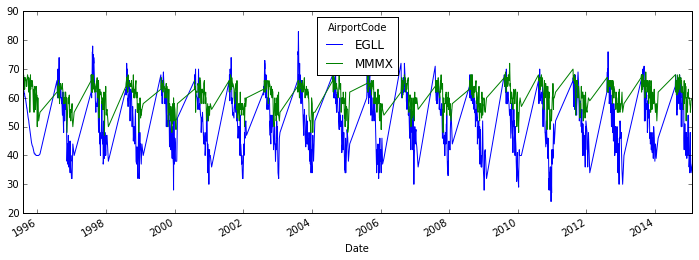

In [45]:
apts = ['EGLL', 'MMMX']
w[w['AirportCode'].isin(apts)].set_index(['Date', 'AirportCode'])['Temp'].unstack().plot(figsize=(12,4))

In [178]:
cts = weather.groupby('AirportCode').size().order()
cts.order()

AirportCode
CYTZ    1294
EGLL    1294
KAGC    1294
KAPA    1294
KAUD    1294
KBFI    1294
KBKL    1294
KBNA    1294
KBTR    1294
KBUF    1294
KBWI    1294
KCAK    1294
KCEU    1294
KCGS    1294
KCLT    1294
KCMI    1294
KDCA    1294
KDET    1294
KDFW    1294
KDTN    1294
KGEU    1294
KGKY    1294
KGRB    1294
KHKS    1294
KHOU    1294
KIND    1294
KLUK    1294
KMDW    1294
KMEM    1294
KMGW    1294
KMIC    1294
KNIP    1294
KNKA    1294
KOAK    1294
KOPF    1294
KOWD    1294
KPDK    1294
KPHX    1294
KPNE    1294
KPTK    1294
KSAN    1294
KSAT    1294
KSFO    1294
KSJC    1294
KSTL    1294
KTEB    1294
KTPF    1294
KTYS    1294
MMMX    1294
dtype: int64

In [76]:
#doc = get_doc(1994, 10, 2, 'KGRB')
#http://www.wunderground.com/history/airport/KGRB/1994/10/2/DailyHistory.html?req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=

# NCDC Parsing

## [Daily NCDC Files](http://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt)
- TOBS = Temperature at the time of observation (tenths of degrees C)
- TMAX = Maximum temperature (tenths of degrees C)
- WSF5 = Fastest 5-second wind speed (tenths of meters per second)
- PRCP = Precipitation (tenths of mm)

In [ ]:
import ulmo
stations = ulmo.ncdc.ghcn_daily.get_stations(country='US', as_dataframe=True)
stations.head()

In [ ]:
dt = stations[(stations['name'].str.lower().str.contains('green bay')) & (stations['state'] == 'WI')]

In [ ]:
#station_id = 'USC00473271'
res = {}
for station_id in dt['id'].unique():
    print(station_id)
    data_keys = ['PRCP', 'WSF5', 'TMAX']
    data = ulmo.ncdc.ghcn_daily.get_data(station_id, elements=data_keys, as_dataframe=True)
    for key in data_keys:
        if key not in data:
            continue
        ts = data[key]['value'].dropna().astype(np.float64)
        if key not in res:
            res[key] = pd.DataFrame({station_id: ts})
        else:
            res[key][station_id] = ts
            
res2 = {}
for key in res:
    res2[key] = res[key].apply(lambda x: np.mean(x[~np.isnan(x)]), axis=1)